# Worksheet 8: Classical Tests Based on Normal and t-Distributions



#### Lecture and Tutorial Learning Goals:
After completing this week's lecture and tutorial work, you will be able to:

1.	Describe the t-distribution family and its relationship with the normal distribution.
2.	Use results from the assumption of normality or the Central Limit Theorem to perform estimation and hypothesis testing.
3.	Compare and contrast the parts of estimation and hypothesis testing that differ between simulation- and resampling-based approaches with the assumption of normality or the Central Limit Theorem- based approaches.
4.	Write a computer script to perform hypothesis testing based on results from the assumption of normality or the Central Limit Theorem.
5.	Discuss the potential limitations of these methods.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
penguins <- read.csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
source("tests_worksheet_08.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.2”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The fo

## 1. Short Recap & Warm-Up

This week we will use the Normal Distribution and Central Limit Theorem you learned last week to test hypotheses. Before we start exploring the new material for this week, let's remind ourselves of some of the most important points covered in the previous week.

**Question 1.1**
<br>{points: 1}

True or false?

Given the sample size is large enough, we can use the CLT to obtain an estimator's sampling distribution.

_Assign your answer to an object called `answer1.1`. Your answer should be either "true" or "false", surrounded by quotes._

In [2]:
# answer1.1 <- ...

### BEGIN SOLUTION
answer1.1 <- "false"
### END SOLUTION

In [3]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br>{points: 1}

Suppose the sampling distribution of an unbiased estimator can be reasonably approximated by a $N(\mu=110, \sigma = 4)$. What of the following intervals is a valid 92% confidence interval for the parameter? 

A. $[98.129; 121.871]$

B. $[102.1601; 117.8399]$

C. $[102.9973; 117.0027]$

D. $[103.4206; 116.5794]$

_Assign your answer to an object called `answer1.2`. Your answer should be a single character surrounded by quotes._

In [4]:
# answer1.2 <- ...

### BEGIN SOLUTION
answer1.2 <- "C"
### END SOLUTION

In [5]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br>{points: 1}

To estimate the heart rate of patients with a given cardiac disease, you took a sample of 500 patients out of a population of 1300 patients. The average heart rate while resting in your sample was 95 bpm, and the standard deviation ten bpm. Which of the following alternatives is right?  


A. Although our sample size is large, the estimator is not a sum of random components. Therefore, we should not apply the CLT.

B. The sample size is too large compared to the population's size, causing a strong violation of the assumption of sample independence. Therefore, we should not apply the CLT.

C. Given the large sample size, it is realistic to apply CLT and obtain a 95% confidence interval given by $[75.4004; 114.5996]$;

D. Given the large sample size, it is realistic to apply CLT and obtain a 99.7% confidence interval given by $[65.3226; 124.6774]$;

E. Both A and B are correct;

F. Both C and D are correct;

_Assign your answer to an object called `answer1.3`. Your answer should be a single character surrounded by quotes._

In [6]:
# answer1.3 <- ...

### BEGIN SOLUTION
answer1.3 <- "B"
### END SOLUTION

In [7]:
test_1.3()

[1] "Success!"


## 2. Student's t Distribution (or, t-distribution)

The $t$-distribution family is quite similar to the standard Normal distribution:
- it is symmetric;
- it is bell-shaped;
- it is unimodal;

Run the cell below to see a plot of some t-distributions.

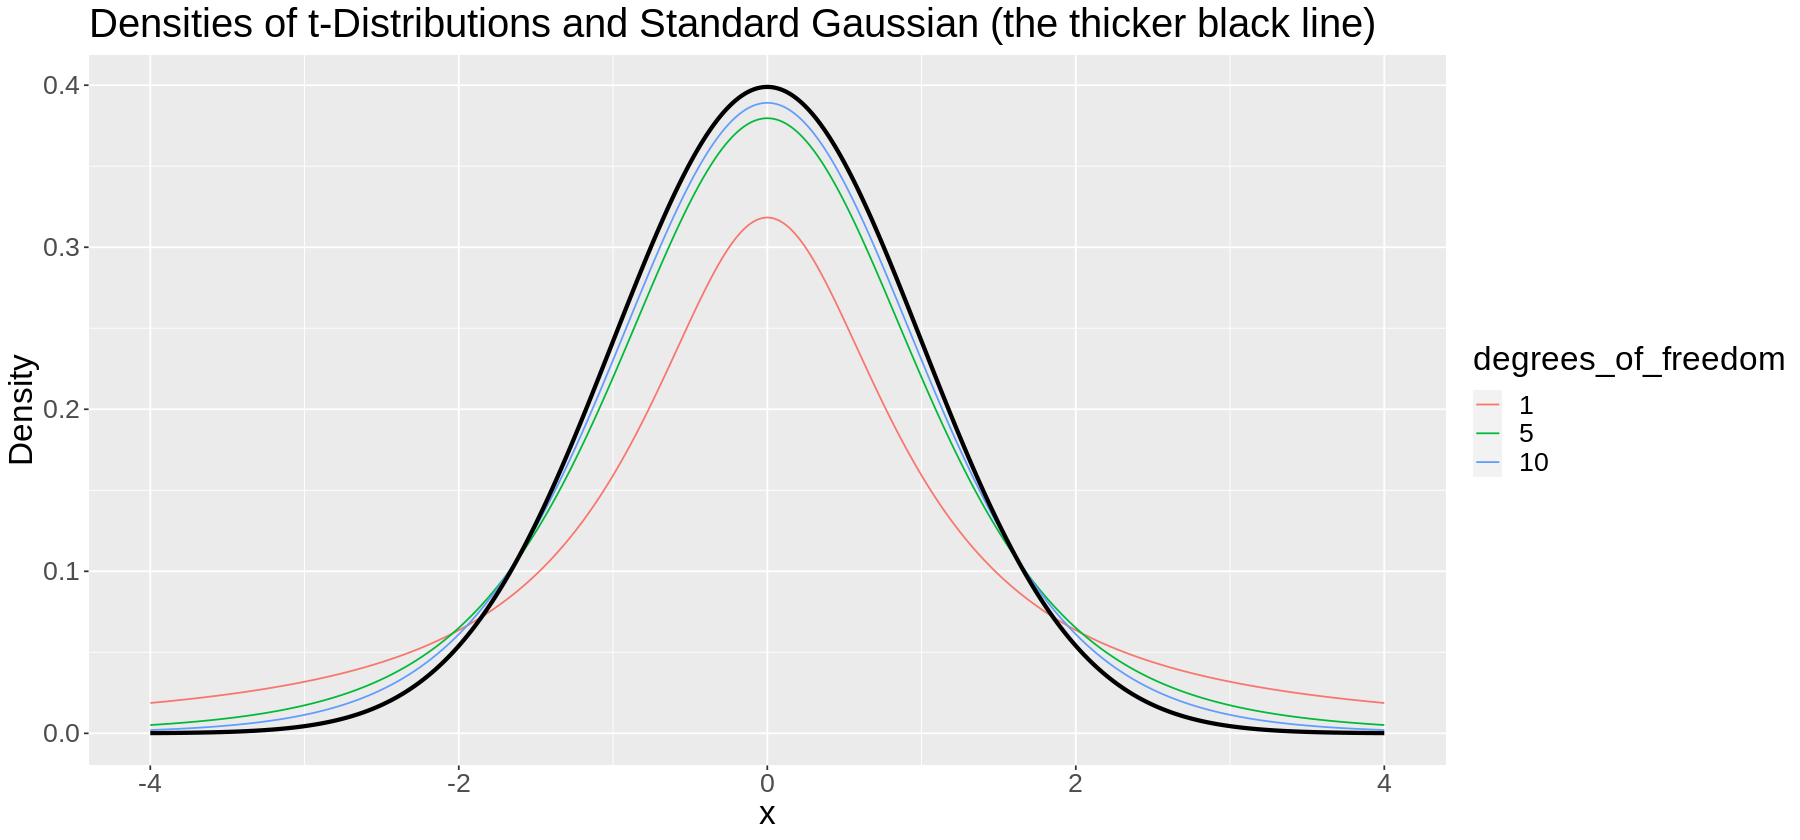

In [8]:
options(repr.plot.width=15, repr.plot.height=7)

densities <- 
    tibble(degrees_of_freedom = c(1, 5, 10)) %>% 
    mutate(tdensity = map(degrees_of_freedom, ~tibble(x = seq(-4, 4, 0.01),
                                     t_density = dt(x,.x),
                                     std_Gaussian = dnorm(x) ))) %>% 
    mutate(degrees_of_freedom = as_factor(degrees_of_freedom)) %>% 
    unnest(tdensity)
    

densities %>% 
    ggplot() +
    geom_line(aes(x, t_density, color = degrees_of_freedom)) + 
    geom_line(aes(x, std_Gaussian), lwd = 1.2) + 
    ggtitle("Densities of t-Distributions and Standard Gaussian (the thicker black line)") + 
    ylab("Density") + 
    theme(text = element_text(size=20)) 

Although t-distributions are very similar to the Standard Gaussian distribution, there are some key differences. A t-distribution:

- is always centred around 0.
- has only one parameter: the degrees of freedom (which controls the spread)
- has heavier tails (mostly for low values of degrees of freedom)
- converges to the Normal distribution for large degrees of freedom (it does not need to be very large, a t-distribution with 50 or more degrees of freedom is almost identical to the Normal distribution).

The heavier tails of the t-distribution allow us to account for "additional" uncertainty compared to the Gaussian distribution. In fact, that was the reason it came up. The t-distribution family was found by William Gousset, an employee at Guinness Brewery, when studying the error around the sample mean for small samples (so, CLT was not applicable). The story behind t-Distribution is quite interesting, and you can read more [here](https://priceonomics.com/the-guinness-brewer-who-revolutionized-statistics/) if you are curious.

To understand better the heavier tails of the t-distributions, let us discuss an example. 


In [9]:
# Run this cell before continuing. 

set.seed(1)

mu = 1.7
sigma = 0.07
gaussian_pop <- 
    tibble(height = rnorm(10000, mu, sigma))

**Question 2.1**
<br>{points: 1}

In the tibble `gaussian_pop`, we measured the height of 10,000 people, which will be our population of interest. Let us take a look at the population distribution. Use the scaffolding below to plot the histogram with the normal distribution:

_Assign your answer to an object named `gaussian_pop_dist`._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



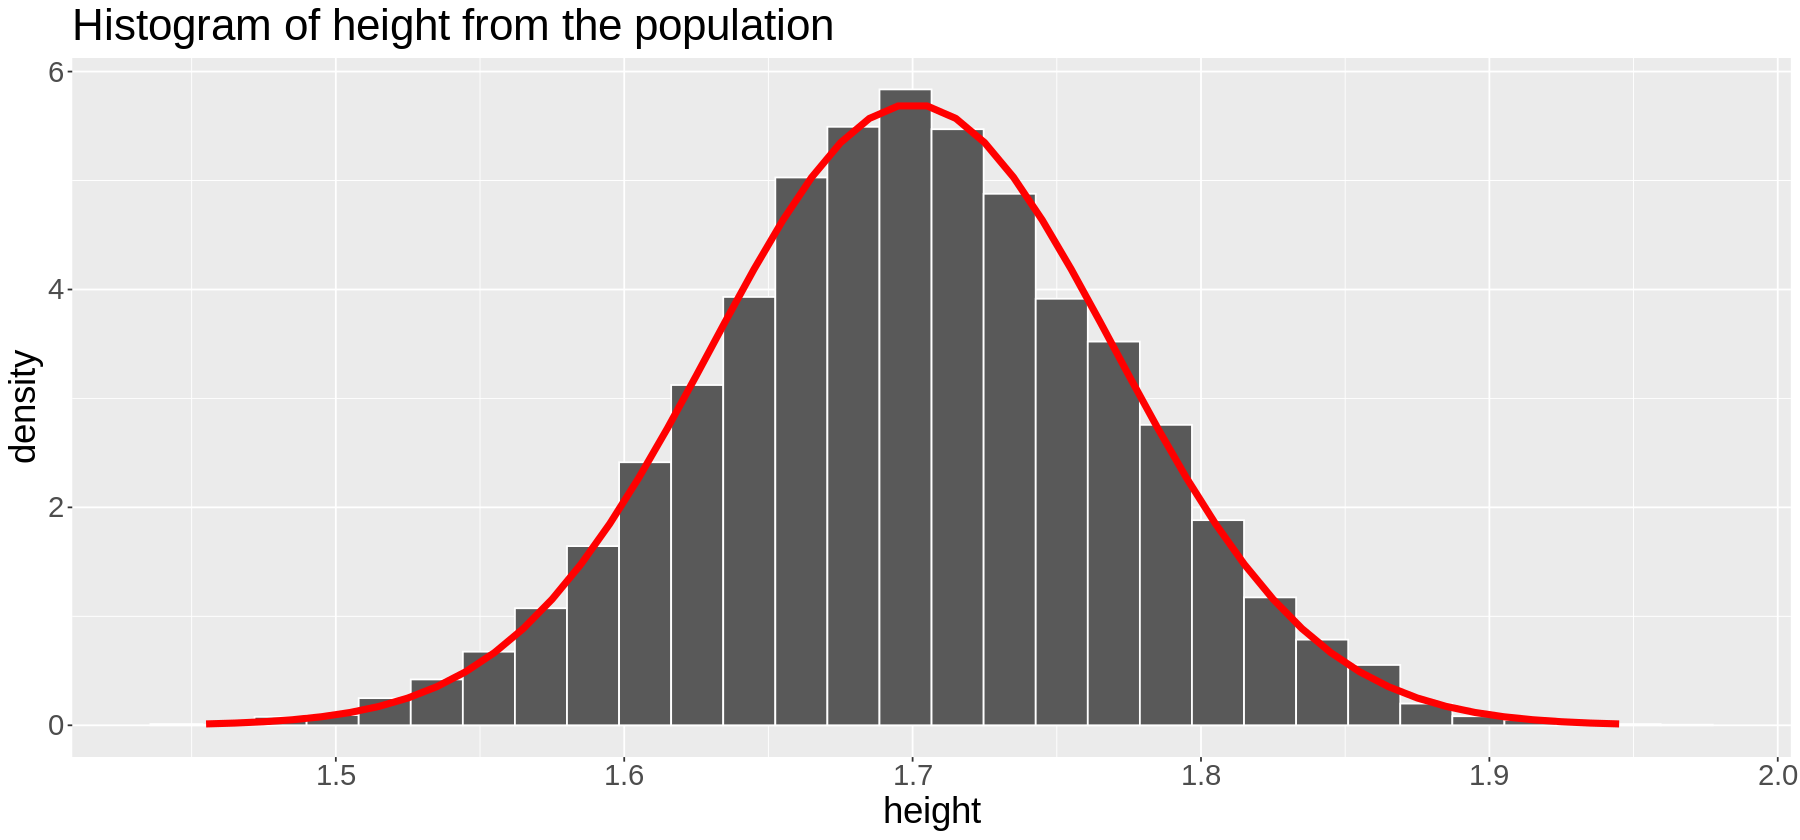

In [10]:
# gaussian_pop_dist <- 
#     ... %>%   
#     ... +
#     ...(aes(..., y = ..density..), color = 'white') +
#     geom_line(data = tibble(x = seq(mu - 3.5*sigma, mu + 3.5*sigma, 0.01), 
#                             density = dnorm(x, mu, sigma)), 
#               aes(x = x, y = density), color = "red", lwd = 2) +
#     ggtitle(...) +
#     theme(text = element_text(size = 22))

### BEGIN SOLUTION
gaussian_pop_dist <- 
    gaussian_pop %>%   
    ggplot() +
    geom_histogram(aes(x = height, y = ..density..), color = 'white') +
    geom_line(data = tibble(x = seq(mu - 3.5*sigma, mu + 3.5*sigma, 0.01), 
                            density = dnorm(x, mu, sigma)), 
              aes(x = x, y = density), color = "red", lwd = 2) +
    ggtitle("Histogram of height from the population") +
    theme(text = element_text(size = 22))
### END SOLUTION

gaussian_pop_dist

In [11]:
test_2.1()

[1] "Success!"


**Question 2.2**
<br> {points: 1}

Last week we saw that the Central Limit Theorem roughly states that the sampling distribution of the sample mean converges to $N\left(\mu, \sigma/\sqrt{n}\right)$, where $\mu$ and $\sigma$ are, respectively, the mean and standard deviation of the population. But what is the distribution of the sample mean for small sample sizes? Unfortunately, it will be highly dependent on the population distribution. If the population is normally distributed, the sampling distribution of the mean is also normally distributed. More specifically, it is $N\left(\mu, \sigma/\sqrt{n}\right)$. 

The previous question clearly showed that our population follows a normal distribution. Now, we are going to draw a large number of **small** samples from the population and calculate their sample means. But this time, we want to standardize the sample means by calculating the Z-score:

$$
Z = \frac{\bar{x}_i - \mu}{\sigma/\sqrt{n}}
$$

We are still pretending that we know $\mu$ and $\sigma$, which are stored in the `mu` and `sigma` variables, respectively. Naturally, our Z-score distribution will be the Standard Normal, i.e., $N(0,1)$. 

Here's your job:

1. draw 2000 samples of size seven from the `gaussian_pop`;
2. for each sample, calculate the sample average;
3. then, obtain the transformed Z-scores of the sample averages and store them in a column named `z`;

_Assign your data frame to an object called `zscore_sample_means`. The data frame should have three columns `replicate`, `sample_mean` and `z`_

In [12]:
set.seed(89) # Do not change this
n <- 7

# zscore_sample_means <-
#     gaussian_pop %>% 
#     rep_sample_n(...) %>% 
#     group_by(...) %>% 
#     summarise(sample_mean = ...) %>% 
#     mutate(z = ... )

### BEGIN SOLUTION
zscore_sample_means <-
    gaussian_pop %>% 
    rep_sample_n(reps = 2000, size = 7, replace = FALSE) %>% 
    group_by(replicate) %>% 
    summarise(sample_mean = mean(height)) %>% 
    mutate(z = sqrt(n) * (sample_mean - mu) / sigma )
    
### END SOLUTION

head(zscore_sample_means)


`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_mean,z
<int>,<dbl>,<dbl>
1,1.695977,-0.1520496
2,1.713907,0.5256510
3,1.686723,-0.5018196
4,1.672142,-1.0529478
5,1.678513,-0.8121200
6,1.687432,-0.4750389


In [13]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br> {points: 1}

Compare the sampling distribution of the z-scores of the sample mean that you obtained in the previous question with the density line of a $N(0, 1)$. Use `binwidth` equals 0.3.

_Assign your plot to an object called `sampling_dist_sample_mean_z`._

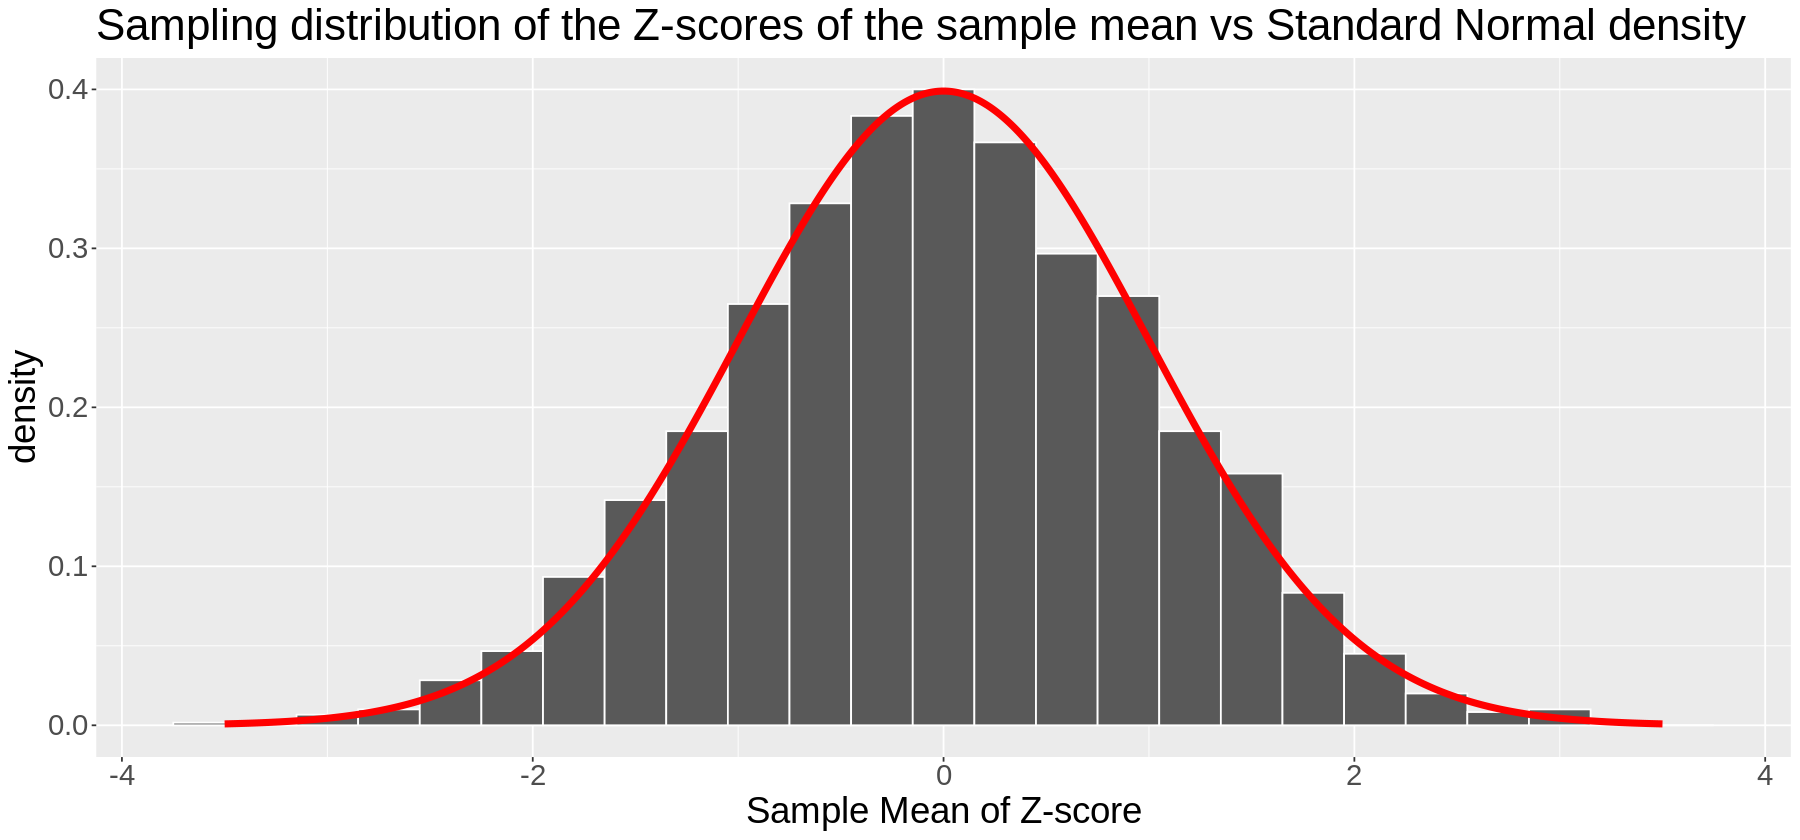

In [14]:
# sampling_dist_sample_mean_z <- 
#     ... %>% 
#     ... + 
#     geom_...(aes(..., ..density..), color = 'white', binwidth = ...) + 
#     geom_line(data = tibble(x = seq(-3.5, 3.5, 0.01), 
#                             density = dnorm(x, 0, 1)), 
#               aes(x = x, y = density), color = "red", lwd = 2) +
#     theme(text = element_text(size = 22)) +
#     xlab("Sample Mean of Z-score") +
#     ggtitle("Sampling distribution of the Z-scores of the sample mean vs Standard Normal density")

### BEGIN SOLUTION
sampling_dist_sample_mean_z <- 
    zscore_sample_means %>% 
    ggplot() + 
    geom_histogram(aes(z, ..density..), color = 'white', binwidth = 0.3) + 
    geom_line(data = tibble(x = seq(-3.5, 3.5, 0.01), 
                            density = dnorm(x, 0, 1)), 
              aes(x = x, y = density), color = "red", lwd = 2) +
    theme(text = element_text(size = 22)) + 
    xlab("Sample Mean of Z-score") +
    ggtitle("Sampling distribution of the Z-scores of the sample mean vs Standard Normal density")
### END SOLUTION

sampling_dist_sample_mean_z

In [15]:
test_2.3()

[1] "Success!"


**Question 2.4**
<br> {points: 1}

In the previous question, you used the population standard deviation (which almost always is unknown) to calculate the z-scores. What can we do in the cases we do not know the true value of $\sigma$? A reasonable answer would be to use the sample standard deviation, $s$. However, by using this approach, there will be an increase in uncertainty. The value of $\sigma$ is fixed, a constant that is just unknown. If we use $s$ instead, we are replacing a constant $\sigma$ with a random variable that changes from sample to sample. Therefore, it would certainly increase our uncertainty as the formula for the z-score now is changing from sample to sample. Would this additional uncertainty affect the sampling distribution of the z-scores of the sample mean? Take a minute to think about this. What do you expect to happen to the sampling distribution above if we have this extra layer of uncertainty?

In this exercise, you are going to:
1. take 10000 samples of size $n=5$
2. calculate the sample average and sample standard deviation of each sample, store them in  variables named `sample_mean` and `sample_sd`, respectively
3. calculate the Z-scores of the sample average, but this time using $s$ instead of $\sigma$, store them in a column called `z`
4. plot the histogram of the sample averages
5. plot the density line of the $N(0, 1)$
5. plot the density line of the $t_{6}$

The scaffolding below is provided to help you accomplish these steps:

```r
n <- 5
sampling_dist_zscore_s <-
    gaussian_pop %>% 
    rep_sample_n(reps = ..., size = n, replace = ...) %>% 
    group_by(...) %>% 
    summarise(sample_mean = ..., sd = ...) %>% 
    mutate(z = ...) %>% 
    ggplot() +
    geom_histogram(aes(..., ..density..), color = 'white', binwidth = 0.3) + 
    geom_line(data = tibble(x = seq(-3.5, 3.5, 0.01), 
                            std_normal = dnorm(x, 0, 1), 
                            t = dt(x, n-1)) %>% 
                      pivot_longer(cols = c(std_normal, t), 
                                   names_to = "distribution", 
                                   values_to = "density"), 
              aes(x = x, y = density, color = distribution), lwd = 2) +
    theme(text = element_text(size = 22)) + 
    xlab("...") +
    ggtitle("Z-score of sample means of height") +
    xlim(-4, 4)
```

Pay close attention to the tails of the distributions.

_Assign your plot to an object called `sampling_dist_zscore_s`._

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 159 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


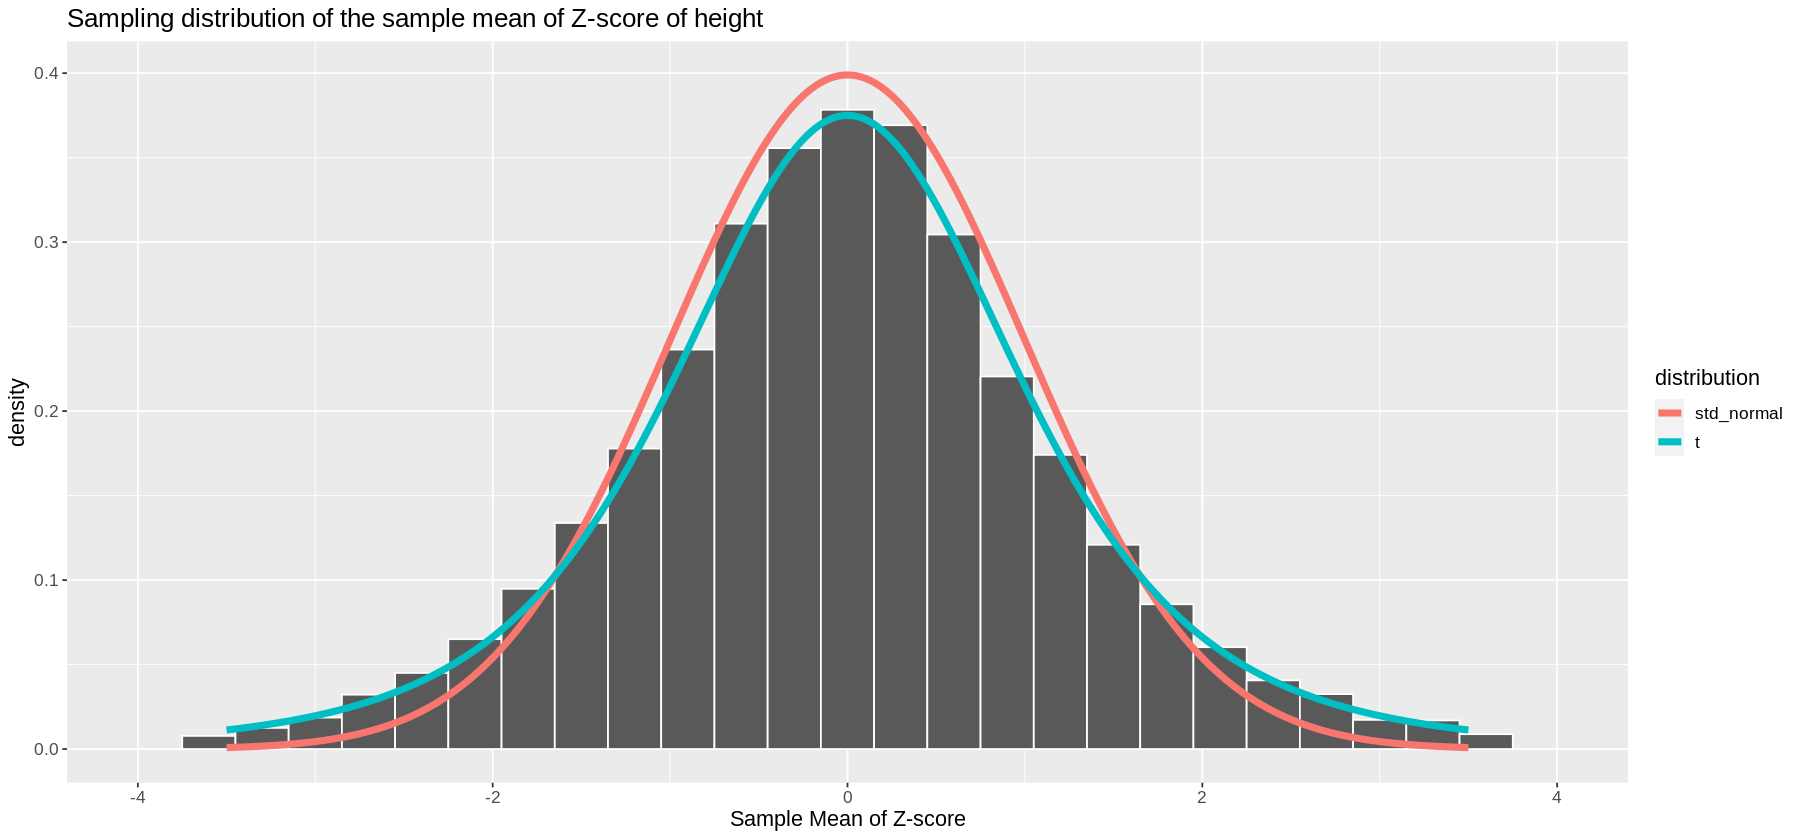

In [16]:
set.seed(5) # Do not change this

# n <- ...
# sampling_dist_zscore_s <-
#     ... %>% 
#     rep_sample_n(reps = ..., size = n, replace = ...) %>% 
#     group_by(...) %>% 
#     summarise(sample_mean = ..., sample_sd = ...) %>% 
#     mutate(z = ...) %>% 
#     ggplot() +
#     ...(aes(..., ..density..), color = 'white', binwidth = 0.3) + 
#     geom_line(data = tibble(x = seq(-3.5, 3.5, 0.01), 
#        std_normal = dnorm(x, 0, 1), 
#        t = dt(x, n-1)) %>% pivot_longer(cols = c(std_normal, t), names_to = "distribution", values_to = "density"), 
#               aes(x = x, y = density, color = distribution), lwd = 2) +
#     theme(text = element_text(size = 22)) + 
#     xlab("Sample Mean of Z-score") +
#     ggtitle(...) +
#     xlim(-4, 4)

### BEGIN SOLUTION
n <- 5
sampling_dist_zscore_s <-
    gaussian_pop %>% 
    rep_sample_n(reps = 10000, size = n, replace = FALSE) %>% 
    group_by(replicate) %>% 
    summarise(sample_mean = mean(height), sample_sd = sd(height)) %>% 
    mutate(z = sqrt(n) * (sample_mean - mu) / sample_sd) %>% 
    ggplot() +
    geom_histogram(aes(z, ..density..), color = 'white', binwidth = 0.3) + 
    geom_line(data = tibble(x = seq(-3.5, 3.5, 0.01), 
       std_normal = dnorm(x, 0, 1), 
       t = dt(x, n-1)) %>% pivot_longer(cols = c(std_normal, t), names_to = "distribution", values_to = "density"), 
              aes(x = x, y = density, color = distribution), lwd = 2) +
    theme(text = element_text(size = 13)) + 
    xlab("Sample Mean of Z-score") +
    ggtitle("Sampling distribution of the sample mean of Z-score of height") +
    xlim(-4, 4)
### END SOLUTION

sampling_dist_zscore_s

In [17]:
test_2.4()

[1] "Success!"


Please take a close look at the distribution's tails and note how our Z-Scores are more spread. If we use the normal distribution to approximate this sampling distribution, we will end up with narrower confidence intervals than we should. Remember when you compared the bootstrap confidence interval with the CLT confidence interval in the previous worksheet? However, for larger sample sizes, the t-distribution becomes much closer to the normal distribution, and the difference of using the normal distribution instead of t-distribution diminishes. 

## 3. Hypothesis Testing

### 3.1 Testing the Mean of One Population:  `one-sample t-test`

In this section, we will use a mathematical approximation to test the population mean. The cases to be considered will be: 

- $H_0: \mu = \mu_0$ vs $H_1: \mu < \mu_0$

- $H_0: \mu = \mu_0$ vs $H_1: \mu > \mu_0$

- $H_0: \mu = \mu_0$ vs $H_1: \mu \neq \mu_0$

To test $H_0$, we use the following test statistic:

$$
T = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}
$$

where $\bar{x}$ is the sample mean, $s$ is the sample standard deviation, $n$ is the sample size, and $\mu_0$ is the value of $\mu$ under $H_0$. 

To test the hypotheses, we need to know the sampling distribution of $T$ under the assumption that $H_0$ is true. There are two cases to consider:

<br>
<dl>
<dt> Case 1: The population is normally distributed
<dd> In this case, under $H_0$ (i.e., if $H_0$ were true), $T$ will follow a t-distribution with $n-1$ degrees of freedom, denoted by $t_{n-1}$. This is true for any sample size. We do not need to use the CLT in this case.
<br>
<br>
<dt> Case 2: The population is NOT normally distributed
<dd> In this case, we need to rely on the CLT. According to the CLT, the sampling distribution of the sample average $\bar{X}$ will converge to a Normal distribution. Therefore, given that $n$ is large enough, the distribution of $T$ will also converge to a $t_{n-1}$ under $H_0$. But in this case, you need to rely that $n$ is big enough.
</dl>

Knowing the distribution of our test statistic $T$ allows us to check if the observed test statistic would be a plausible value if $H_0$ were true. If the observed test statistics fall in the red region in the plots below, we will reject $H_0$. The significance level specifies the size of the red region. 

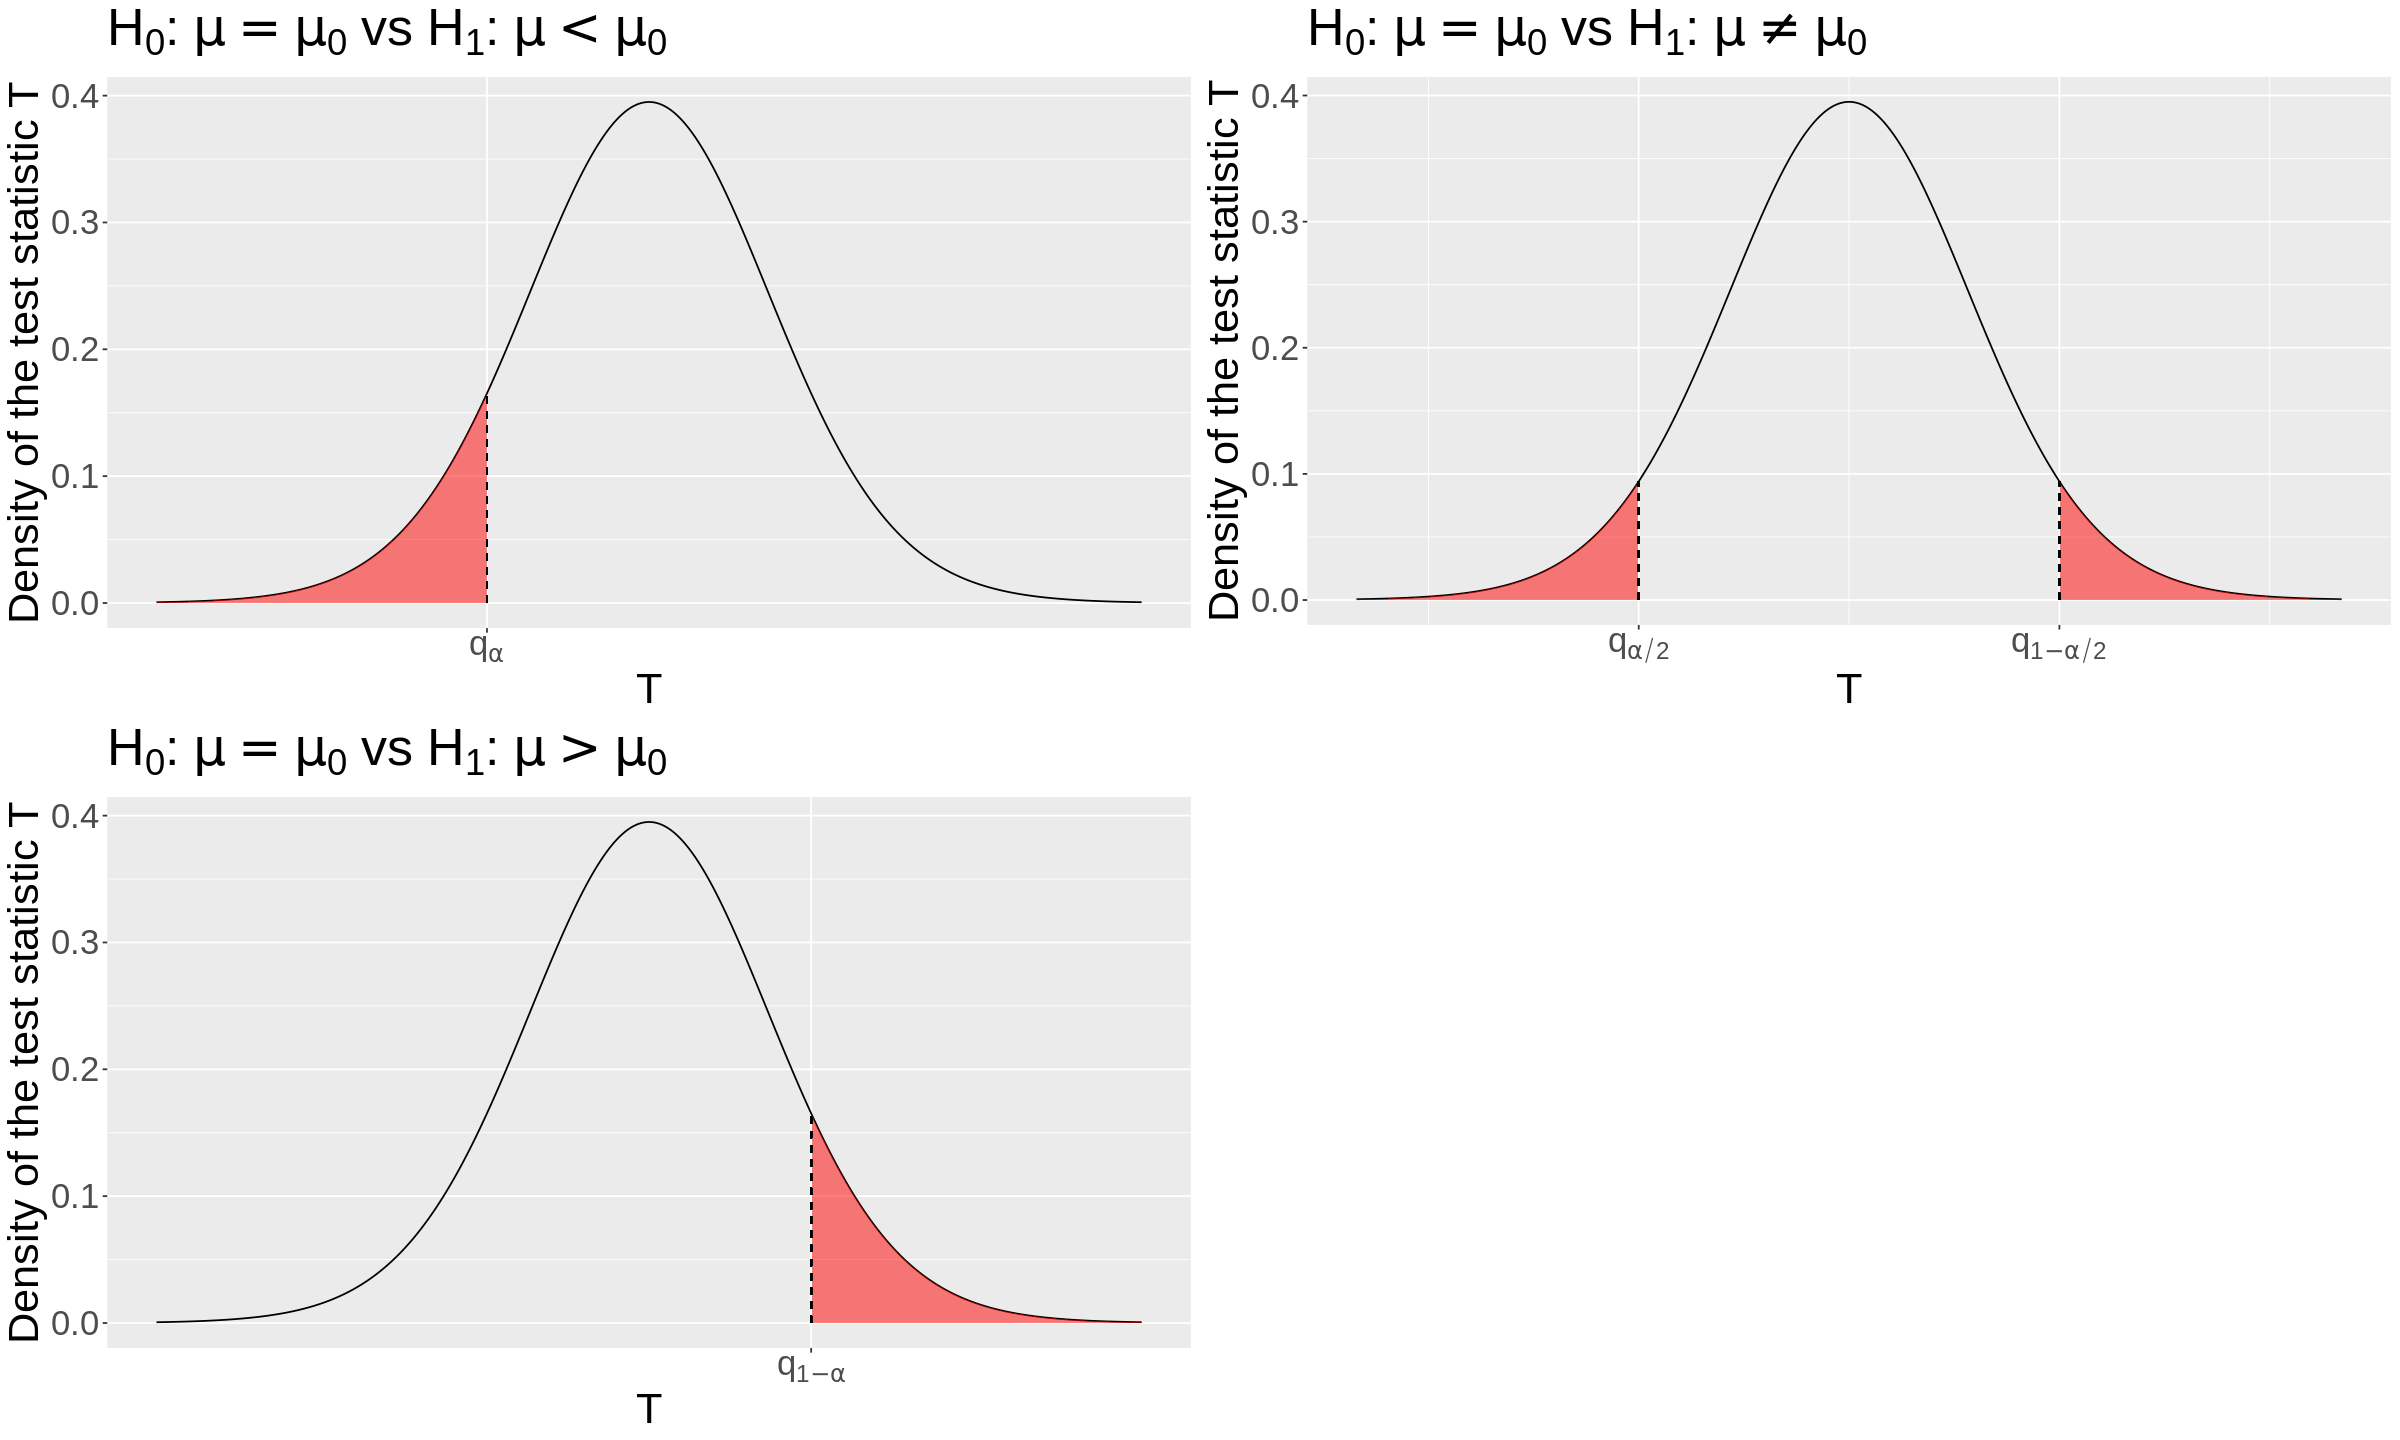

In [18]:
# Run this cell to see the plots

options(repr.plot.width = 20, repr.plot.height = 12)

q <- map_dbl(c(0.05, 0.025, 0.975, 0.95), qt, df = 25)
t <- tibble(T = seq(-4, 4, 0.01), density = dt(T, 25))
    

base_plot <-
    ggplot(t) + 
    geom_line(aes(T, density)) + 
    theme(text = element_text(size=26)) +
    ylab("Density of the test statistic T")

plots <- list()
plots[[1]] <-    
    base_plot + 
    geom_ribbon(t %>% filter(T < qt(0.1, 25)),
                mapping = aes(x = T, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
    ggtitle(expression(paste(H[0], ": ", mu == mu[0], " vs ", H[1], ": ", mu < mu[0],))) + 
    scale_x_continuous(labels = expression(q[alpha]), breaks = c(qt(0.1, 25)) ) + 
    geom_segment(aes(x = qt(0.1, 25), xend= qt(0.1, 25), y = 0, yend=dt(qt(0.1, 25), 25)), colour="black", linetype = 'dashed')



plots[[2]] <-    
    base_plot + 
    geom_ribbon(t %>% filter(T < qt(0.05, 25)),
                mapping = aes(x = T, ymax = density, ymin = 0), alpha = 0.5, fill = "red") +
    geom_ribbon(t %>% filter(T > qt(0.95, 25)),
                mapping = aes(x = T, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
    ggtitle(expression(paste(H[0], ": ", mu == mu[0], " vs ", H[1], ": ", mu != mu[0],))) + 
    scale_x_continuous(labels = c(expression(q[alpha/2]), expression(q[1-alpha/2])), breaks = c(qt(0.05, 25), qt(0.95, 25)) ) +
    geom_segment(aes(x = qt(0.05, 25), xend= qt(0.05, 25), y = 0, yend=dt(qt(0.05, 25), 25)), colour="black", linetype = 'dashed') +
    geom_segment(aes(x = qt(0.95, 25), xend= qt(0.95, 25), y = 0, yend=dt(qt(0.95, 25), 25)), colour="black", linetype = 'dashed')

plots[[3]] <-    
    base_plot + 
    geom_ribbon(t %>% filter(T > qt(0.9, 25)),
                mapping = aes(x = T, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
    ggtitle(expression(paste(H[0], ": ", mu == mu[0], " vs ", H[1], ": ", mu > mu[0],))) + 
    scale_x_continuous(labels = expression(q[1-alpha]), breaks = c(qt(0.9, 25)) ) +
    geom_segment(aes(x = qt(0.9, 25), xend= qt(0.9, 25), y = 0, yend=dt(qt(0.9, 25), 25)), colour="black", linetype = 'dashed')

grid.arrange(grobs = plots, ncol = 2)

Now it is your turn! 

The medical community has long declared the average temperature of healthy human bodies to be 98.2 degrees Fahrenheit. Let us check such a claim. We have body temperature measurements of 130 people ([ref 1](http://jse.amstat.org/datasets/normtemp.txt)). The data set has three columns:

1. the body temperature (in degree Fahrenheit);
2. the sex;
3. heart rate (beats per minute) 

Run the cell below to load the data set.

In [19]:
options(repr.plot.width = 16, repr.plot.height = 8)
# Run this cell before continuing
body_temp <-
    read.table("http://jse.amstat.org/datasets/normtemp.dat.txt",
                col.names = c("body_temp", "sex", "heart_rate"), header = FALSE) %>% 
    mutate(sex = if_else(sex == 1, "male", "female")) %>% 
    mutate(sex = as_factor(sex))
    

head(body_temp)

,body_temp,sex,heart_rate
,<dbl>,<fct>,<int>
1,96.3,male,70
2,96.7,male,71
3,96.9,male,74
4,97.0,male,80
5,97.1,male,73
6,97.1,male,75


**Question 3.1.0**
<br>{points: 1}

Which of the alternatives below has the appropriate hypotheses?

A. $H_0: \mu = \mu_0$ vs $H_1: \mu < \mu_0$

B. $H_0: \mu = \mu_0$ vs $H_1: \mu > \mu_0$

C. $H_0: \mu = \mu_0$ vs $H_1: \mu \neq \mu_0$

D. $H_0: \mu \neq \mu_0$ vs $H_1: \mu = \mu_0$

E. $H_0: \mu < \mu_0$ vs $H_1: \mu = \mu_0$

F. $H_0: \mu > \mu_0$ vs $H_1: \mu = \mu_0$

G. $H_0: \mu \geq \mu_0$ vs $H_1: \mu < \mu_0$

H. $H_0: \mu \leq \mu_0$ vs $H_1: \mu > \mu_0$

_Assign your answer to an object called `answer3.1.0`. Your answer should be a single character surrounded by quotes._

In [20]:
# answer3.1.0 <- ...

### BEGIN SOLUTION
answer3.1.0 <- "C"
### END SOLUTION

In [21]:
test_3.1.0()

[1] "Success!"


**Question 3.1.1**
<br> {points: 1}

To begin our study, we need to take a look at the sample distribution to understand if we are dealing with a roughly Normal distribution or a super weird distribution (or anything in between). Plot the sample histogram of `body_temp`. Use `bindwith` equals 0.2.

_Assign your plot to an object called `answer3.1.1`._

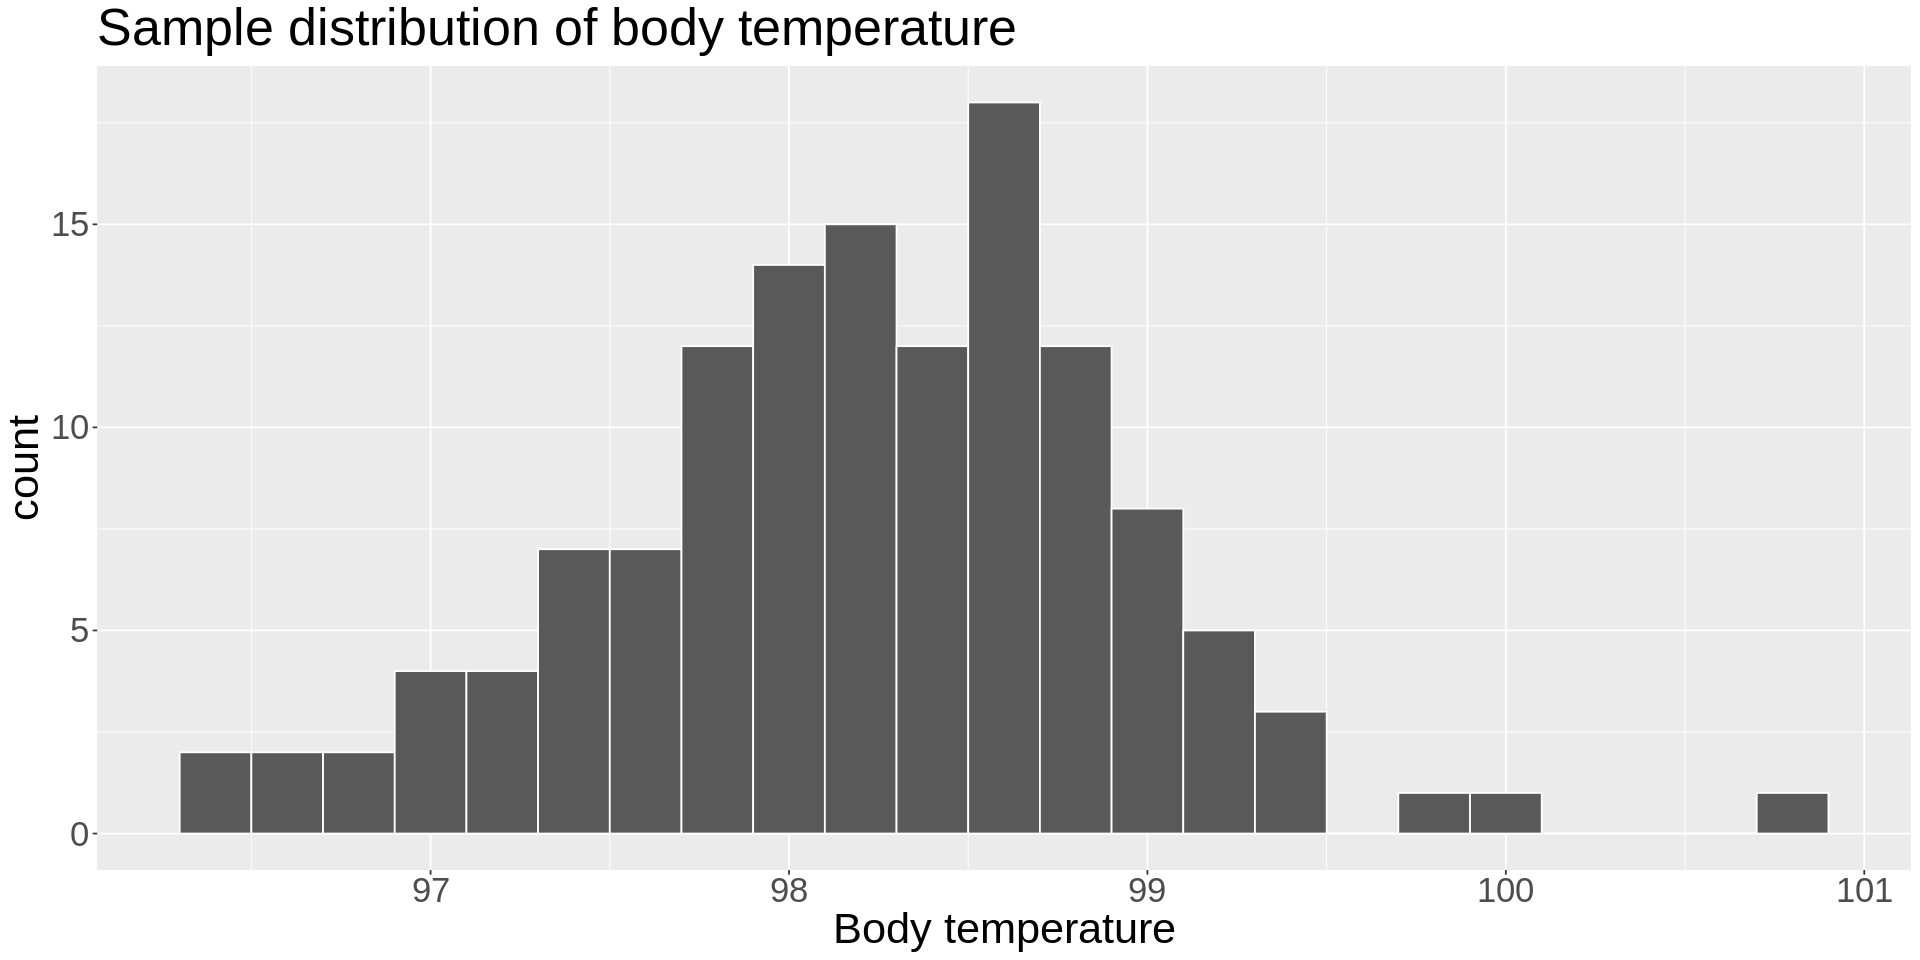

In [22]:
# answer3.1.1 <-
#    ... %>% 
#    ...

### BEGIN SOLUTION
answer3.1.1 <- 
    body_temp %>% 
    ggplot() +
    geom_histogram(aes(body_temp), color = "white", binwidth = 0.2) +
    theme(text = element_text(size=26)) +
    xlab("Body temperature") +
    ggtitle("Sample distribution of body temperature")
### END SOLUTION

answer3.1.1

In [23]:
test_3.1.1()

[1] "Success!"


**Question 3.1.2**
<br>{points: 1}

True or false?

The sample distribution of body temperature is roughly symmetrical and unimodal. It does not seem to be too far from the Normal distribution. At the very least, it indicates that it should be ok to rely on the CLT here. 


_Assign your answer to an object called `answer3.1.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [24]:
# answer3.1.2 <- ...

### BEGIN SOLUTION
answer3.1.2 <- "true"
### END SOLUTION

In [25]:
test_3.1.2()

[1] "Success!"


**Question 3.1.3** 
<br> {points: 1}

Calculate the test statistic, $T$.

_Assign your answer to an object called `observed_test_statistic3.1.3`. Your answer should be a single number._

In [26]:
# observed_test_statistic3.1.3 <- 
#    (mean(body_temp$...) - ...) / ( ... / ...(nrow(...)))

### BEGIN SOLUTION
observed_test_statistic3.1.3 <- 
    sqrt(nrow(body_temp)) * (mean(body_temp$body_temp) - 98.2) / sd(body_temp$body_temp)
### END SOLUTION

observed_test_statistic3.1.3

[1] 0.7655892

In [27]:
test_3.1.3()

[1] "Success!"


**Question 3.1.4**
<br> {points: 1}

Complete the scaffolding below to plot the null model, i.e., the sampling distribution of $T$ under $H_0$, the observed $T$ value and a ten percent critical region. 

```r
null_model3.1.4 <-
    tibble(t = seq(-4, 4, 0.01), density = dt(t, df = ...)) %>% 
    ggplot() + geom_line(aes(t, density)) +
    geom_segment(aes(x = observed_test_statistic3.1.3, 
                     y = 0, 
                     xend= observed_test_statistic3.1.3,
                     yend = dt(observed_test_statistic3.1.3, ...)),
                 colour="blue", linetype = 'dashed') + 
    geom_ribbon(. %>% filter(t > qt(0.95, ...)),
                mapping = aes(x = t, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
    geom_ribbon(. %>% filter(t > qt(0.05, ...)),
                mapping = aes(x = t, ymax = density, ymin = 0), alpha = 0.5, fill = "red")
    
    theme(text = element_text(size=22)) + 
    xlab("...") +
    ggtitle("...")
```

_Assign your plot to an object called `null_model3.1.4`._

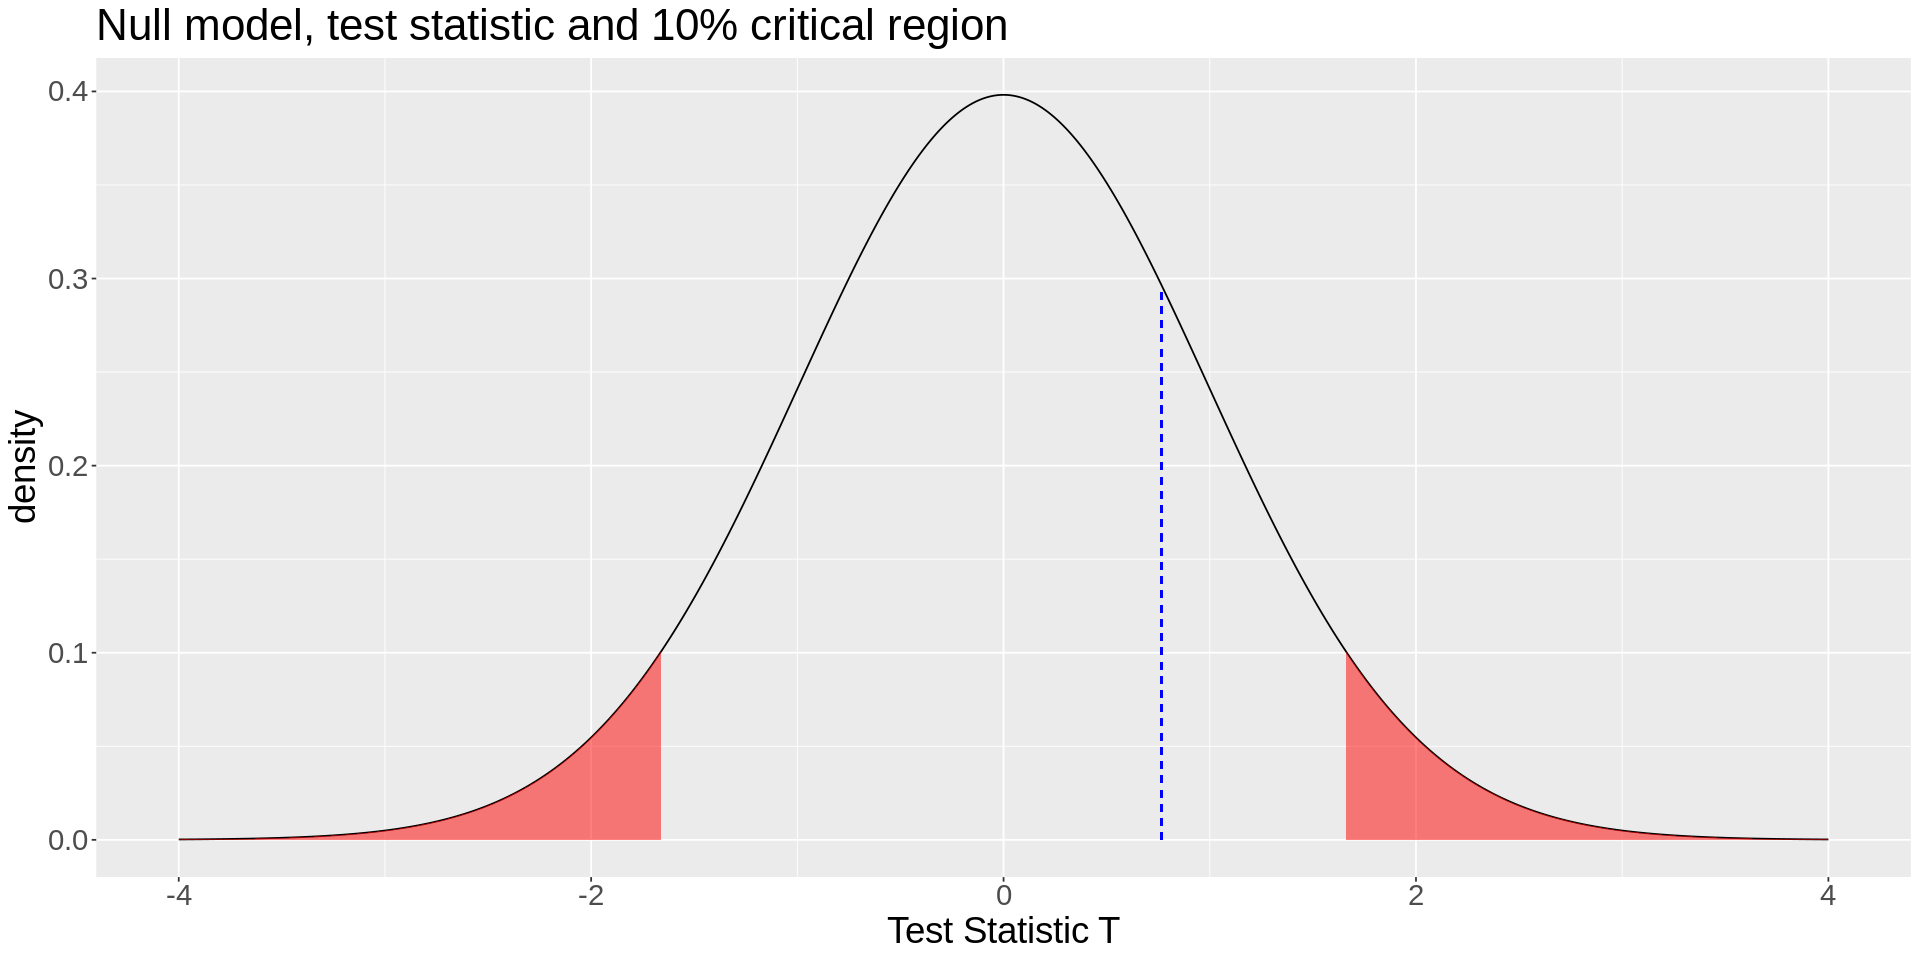

In [28]:
### BEGIN SOLUTION
null_model3.1.4 <-
    tibble(t = seq(-4, 4, 0.01), density = dt(t, df = nrow(body_temp) - 1)) %>% 
    ggplot() + 
    geom_line(aes(t, density)) +
    geom_segment(aes(x = observed_test_statistic3.1.3, xend= observed_test_statistic3.1.3,
                     y = 0, yend=dt(observed_test_statistic3.1.3, nrow(body_temp) - 1)),
                 colour="blue", linetype = 'dashed') + 
    geom_ribbon(. %>% filter(t > qt(0.95, nrow(body_temp)-1)),
                mapping = aes(x = t, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
    geom_ribbon(. %>% filter(t < qt(0.05, nrow(body_temp)-1)),
                mapping = aes(x = t, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
    theme(text = element_text(size=22)) + 
    xlab("Test Statistic T") +
    ggtitle("Null model, test statistic and 10% critical region")
### END SOLUTION

null_model3.1.4

In [29]:
test_3.1.4()

[1] "Success!"


**Question 3.1.5** 
<br> {points: 1}

Using the test statistic you obtained in Question 3.1.3, calculate the p-value.

_Assign your answer to an object called `answer3.1.5`. Your answer should be a single number._

In [30]:
# answer3.1.5 <- ...

### BEGIN SOLUTION
answer3.1.5 <- 2 * pt(observed_test_statistic3.1.3, 
                  df = nrow(body_temp) - 1, 
                  lower.tail = FALSE )
### END SOLUTION

answer3.1.5

[1] 0.4453192

In [31]:
test_3.1.5()

[1] "Success!"


**Question 3.1.6**
<br>{points: 1}

What is your decision at 10% significance level?

A. Since the p-value is higher than 0.10, we should not reject $H_0$.

B. Since the p-value is higher than 0.10, we should reject $H_0$.

_Assign your answer to an object called `answer3.1.6`. Your answer should be a single character surrounded by quotes._

In [32]:
# answer3.1.6 <- ...

### BEGIN SOLUTION
answer3.1.6 <- "A"
### END SOLUTION

answer3.1.6

[1] "A"

In [33]:
test_3.1.6()

[1] "Success!"


**Question 3.1.7**
<br>{points: 1}

In the previous exercises, you went through the whole process of hypothesis testing. However, luckily for us, R already has the t-test implemented: the `t.test` function. At this point, it would be good for you to start practicing with reading the documentation. So try it out! Check `?t.test` and test the hypotheses using `t.test`. Make sure to use `broom::tidy()` to get a more organized result.

_Assign your answer (the output of `t.test`) to an object called `answer3.1.7`._

In [34]:
# answer3.1.7 <- 
#     tidy(
#         t.test(....)
#     )

### BEGIN SOLUTION
answer3.1.7 <- tidy(
                   t.test(body_temp$body_temp, mu = 98.2)
                )
### END SOLUTION

answer3.1.7

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
98.24923,0.7655892,0.4453192,129,98.122,98.37646,One Sample t-test,two.sided


In [35]:
test_3.1.7()

[1] "Success!"


### 3.2 Testing the Proportion of One Population: `one-sample z-test`

For this section, we are going to study the case where we want to test a proportion. As a matter of fact, this is just a particular case of the previous section (testing the mean); after all, the proportion is nothing else than the mean of a 0-1 random variable.

The cases to be considered are: 

- $H_0: p = p_0$ vs $H_1: p < p_0$

- $H_0: p = p_0$ vs $H_1: p > p_0$

- $H_0: p = p_0$ vs $H_1: p \neq p_0$

To test $H_0$, we use the following test statistic:

$$
Z = \frac{\hat{p} - p_0}{\sqrt{p_0(1-p_0)/n}}
$$

where $\hat{p}$ is the sample proportion, $n$ is the sample size, and $p_0$ is the value of $p$ under $H_0$. Since, in this case, the population distribution is clearly not Normal (the random variable is a 0-1 variable), we need to rely on the CLT.

Given that the sample size is large enough, the null model (i.e., the sampling distribution under $H_0$) of the test statistic $Z$ is approximately $N(0, 1)$. Roughly speaking, if the sample size is such that $n p_0 \geq 10$ and $n(1-p_0)\geq 10$, the approximation of the null-model by the standard Gaussian is fairly good.

Your turn!

In this section, we will use a subset of the 1987 National Indonesia Contraceptive Prevalence Survey, available [here](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice). Let's start by reading the data. 

In [36]:
# Run this cell before continuing.

contraceptive_survey_data <-
    read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data", 
         col_names = FALSE) %>% 
    select(X2, X10) %>% 
    mutate(X2 = as_factor(X2), X10 = as_factor(X10)) %>% 
    rename(education_level = X2, contraceptive = X10) %>% 
    mutate(education_level = fct_recode(education_level,
                                        "high" = "4",
                                        "high" = "3", 
                                        "low" = "2",
                                        "low" = "1"),
           contraceptive = fct_recode(contraceptive,
                                     "No" = "1",
                                     "Yes" = "2",
                                     "Yes" = "3"))

contraceptive_survey_data %>%
    sample_n(10) %>% 
    head()

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double()
)



education_level,contraceptive
<fct>,<fct>
high,No
high,Yes
high,No
high,Yes
high,Yes
low,Yes


**Question 3.2.1**
<br>{points: 1}

We want to check if most married Indonesian women were using a contraceptive at the time of the survey at a 15% significance level. 

What are the hypotheses in question?

A. $H_0: p > 0.5$ vs $H_1: p=0.5$

B. $H_0: p = 0.5$ vs $H_1: p < 0.5$

C. $H_0: p = 0.5$ vs $H_1: p > 0.5$

D. $H_0: p < 0.5$ vs $H_1: p = 0.5$

_Assign your answer to an object called `answer3.2.1`. Your answer should be a single character surrounded by quotes._



In [37]:
# answer3.2.1 <- ...

### BEGIN SOLUTION
answer3.2.1 <- "C"
### END SOLUTION

In [38]:
test_3.2.1()

[1] "Success!"


**Question 3.2.2** 
<br> {points: 1}

Obtain the proportion of women using contraceptive methods.

_Assign your answer to an object called `answer3.2.2_phat`. Your answer should be a single number._

In [39]:
# answer3.2.2 <- mean(...)

### BEGIN SOLUTION
answer3.2.2_phat <- mean(contraceptive_survey_data$contraceptive == "Yes")
### END SOLUTION

answer3.2.2_phat

[1] 0.5729803

In [40]:
test_3.2.2()

[1] "Success!"


**Question 3.2.3** 
<br> {points: 1}

We can see that the sample proportion is slightly higher than 0.5. But is it enough for us to confidently claim that true proportion is higher than 0.5? To answer this question, calculate the test statistic, Z. 

_Assign your answer to an object called `answer3.2.3_test_statistic`. Your answer should be a single number._

In [41]:
# answer3.2.3_test_statistic <- ...

### BEGIN SOLUTION
p0 <- 0.5
answer3.2.3_test_statistic <- 
    (answer3.2.2_phat - 0.5) / sqrt( p0 * (1-p0)/nrow(contraceptive_survey_data))
### END SOLUTION

answer3.2.3_test_statistic

[1] 5.601922

In [42]:
test_3.2.3()

[1] "Success!"


**Question 3.2.4** 
<br> {points: 1}

Calculate the p-value of the test. 

_Assign your answer to an object called `answer3.2.4_pvalue`. Your answer should be a single number._

In [43]:
# answer3.2.4_pvalue <- pnorm(...)

### BEGIN SOLUTION

answer3.2.4_pvalue <- 
    pnorm(answer3.2.3_test_statistic, lower.tail = FALSE)
### END SOLUTION

answer3.2.4_pvalue

[1] 1.059937e-08

In [44]:
test_3.2.4()

[1] "Success!"


**Question 3.2.5**
<br>{points: 1}

What is your conclusion at a 15% significance level?

A. We do not have enough evidence at a 15% significance level to conclude that most Indonesian women were using contraceptives in 1987. 

B. At a 15% significance level, we can conclude that most Indonesian women were using contraceptives in 1987.

_Assign your answer to an object called `answer3.2.5`. Your answer should be a single character surrounded by quotes._

In [45]:
# answer3.2.5 <- ...

### BEGIN SOLUTION
answer3.2.5 <- "B"
### END SOLUTION

answer3.2.5

[1] "B"

In [46]:
test_3.2.5()

[1] "Success!"


**Question 3.2.6** 
<br> {points: 1}

Again, R can take care of all this work for us. The function `prop.test` will return detailed information about the hypothesis test. Use the scaffolding below to run the test with R. Make sure to use `broom::tidy()` to get a more organized result.

```r
answer3.2.6 <- 
    tidy(
        prop.test(
        x = # the number of successes,
        n = # the number of trials, 
        p = # p0 (i.e., the value of p under H0),
        alternative = # alternative hypothesis: "less", "greater", "two.sided"
        conf.level = # the desired confidence level,
        correct = FALSE))
```


_Assign your answer to an object called `answer3.2.6`._

In [47]:
### BEGIN SOLUTION
answer3.2.6 <- 
    tidy(prop.test(x = sum(contraceptive_survey_data$contraceptive == "Yes"), 
              n = nrow(contraceptive_survey_data), 
              p = 0.5, 
              alternative = "greater", 
              conf.level = 0.85,
              correct=FALSE))
### END SOLUTION

answer3.2.6

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.5729803,31.38153,1.059937e-08,1,0.5595741,1,1-sample proportions test without continuity correction,greater


In [48]:
test_3.2.6()

[1] "Success!"


### 3.3 Comparing the Means of Two Independent Populations: `two-sample t-test`

This section will introduce a mathematical approximation to test the difference between two **independent** populations' means.

The scenarios to be considered:

- $H_0: \mu_1 - \mu_2 = d_0$ vs $H_1: \mu_1 - \mu_2 \neq d_0$
- $H_0: \mu_1 - \mu_2 = d_0$ vs $H_1: \mu_1 - \mu_2 > d_0$
- $H_0: \mu_1 - \mu_2 = d_0$ vs $H_1: \mu_1 - \mu_2 < d_0$

To carry out this hypothesis test, we take two independent samples, one from each population. By independent samples, we mean that the individuals are selected independently in each population.

Let $x_1, x_2, \ldots, x_{n_1}$ be a random sample of size $n_1$ from population A, with mean $\mu_1$ and standard deviation $\sigma_1$. Let $y_1, y_2, \ldots, y_{n_2}$ be a random sample of size $n_2$ from population B, with mean $\mu_2$ and standard deviation $\sigma_2$. 

<img src="imgs/two-sample-t-test.png" width=700px/>


Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$
If both populations are normally distributed, the null model is valid for all sample sizes. However, if the populations are not normally distributed, we need to rely on the CLT, i.e., we need large sample sizes. 

Your turn!

Let us try to answer the following question: do the flippers of Adelie penguins differ in length from the flippers of Chinstrap penguins? 

**Question 3.3.1**
<br> {points: 1}

Boxplot is a very nice way to compare distributions. Let's start by taking a look at the boxplot of the flippers' length of both species, `Adelie` and `Chinstrap`.

```r
flipper_length_boxplots <-
    adelie_chin %>% 
    ggplot() +
    geom_boxplot(aes(..., ..., fill = ...)) +
    theme(text = element_text(size = 22)) +
    ggtitle(...) + 
    xlab(...) + 
    ylab(...) + 
    guides(fill = FALSE)
```


_Assign your plot to an object called `flipper_length_boxplots`._

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


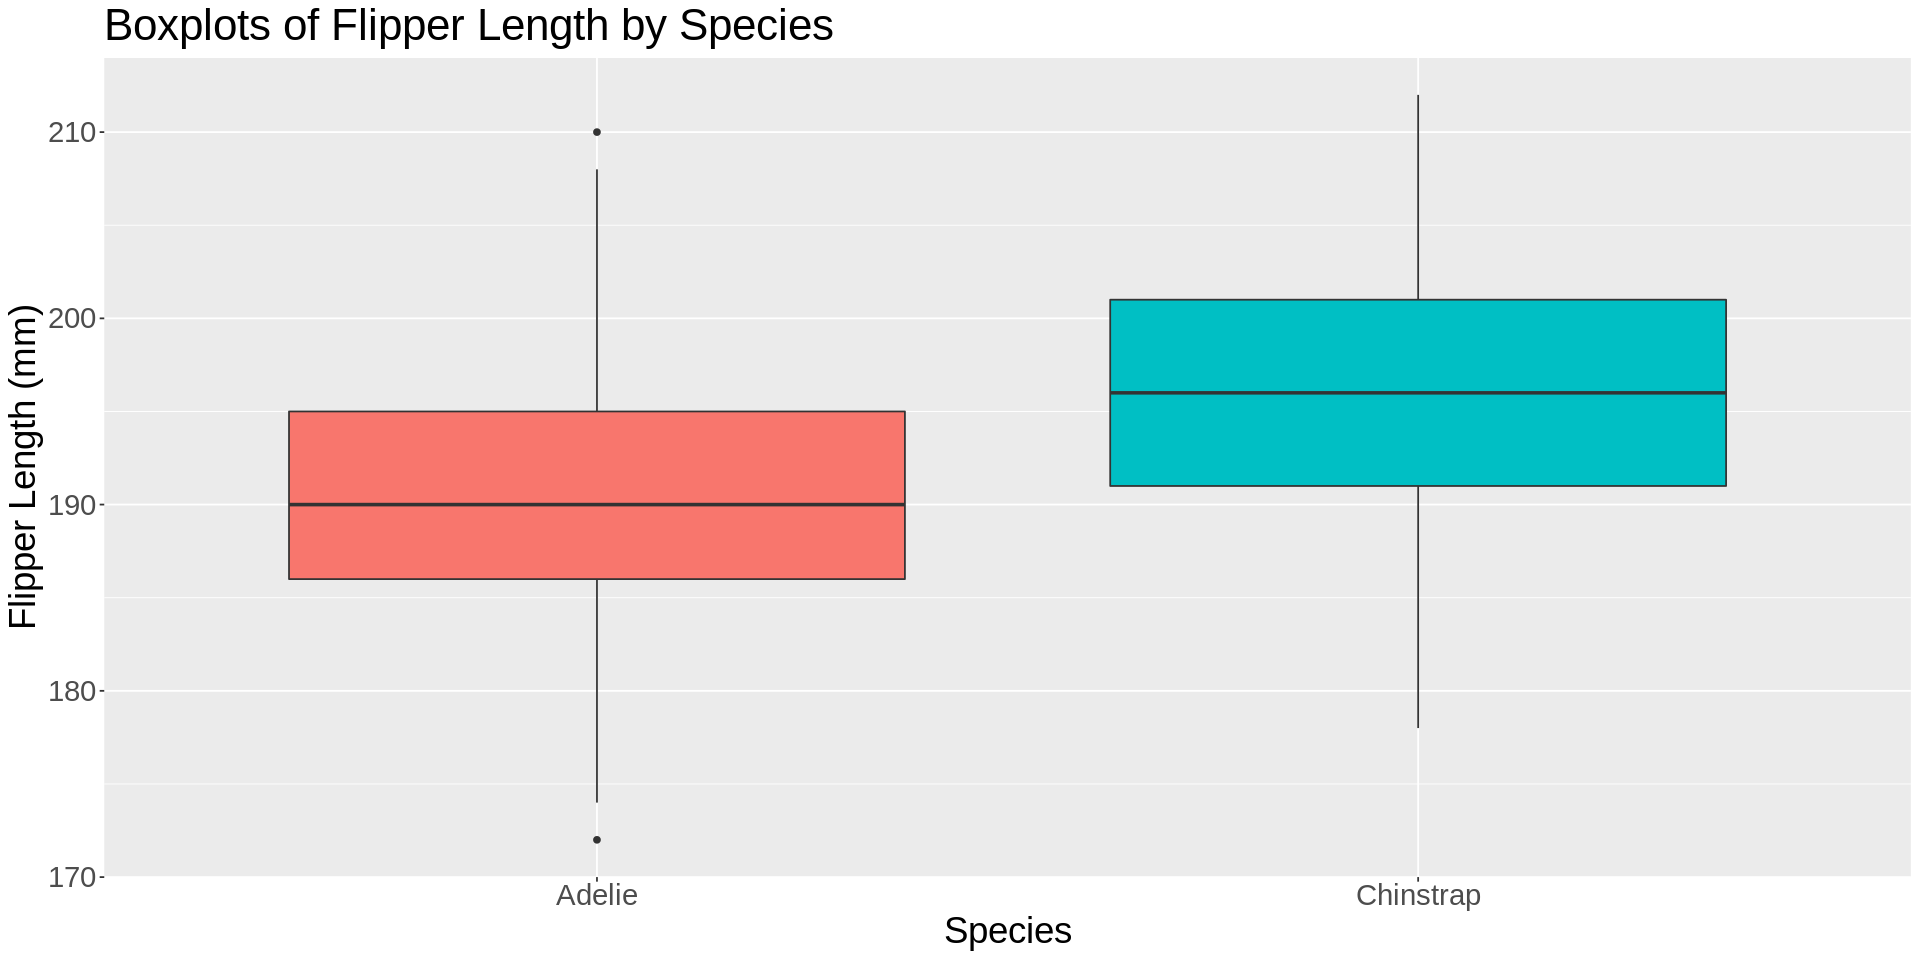

In [49]:
adelie_chin <- 
    penguins %>% 
    filter(species %in% c("Adelie", "Chinstrap")) # Do not delete this

### BEGIN SOLUTION
flipper_length_boxplots <-
    adelie_chin %>% 
    ggplot() +
    geom_boxplot(aes(species, flipper_length_mm, fill=species)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Boxplots of Flipper Length by Species") + 
    xlab("Species") + 
    ylab("Flipper Length (mm)") + 
    guides(fill = FALSE)
### END SOLUTION

flipper_length_boxplots

In [50]:
test_3.3.1()

[1] "Success!"


**Question 3.3.2** 
<br> {points: 1}

The boxplot indicates that the Chinstrap penguins have slightly longer flippers. But we have to always keep in mind that we only have a sample of the penguins and not all existing Adelie and Chinstrap penguins. 

Let us keep up our investigation. This time obtain the sample mean, sample standard deviation, and the number of penguins, for both species and store them in the columns `sample_mean`, `sample_var`, and `n`, respectively. (Hint: remember to filter out the NAs). 

_Assign your data frame to an object called `adelie_chin_summary`. Your data frame should have four columns: `species`, `sample_mean`, `sample_var`, and `n`._

In [51]:
# adelie_chin_summary <- 
#     adelie_chin %>% 
#     ...(!is.na(flipper_length_mm)) %>% 
#     group_by(species) %>% 
#     summarise(sample_mean = ..., 
#               sample_var = ..., 
#               n = ...)

### BEGIN SOLUTION
adelie_chin_summary <- 
    adelie_chin %>% 
    filter(!is.na(flipper_length_mm)) %>% 
    group_by(species) %>% 
    summarise(sample_mean = mean(flipper_length_mm), sample_var = var(flipper_length_mm), n = n())
### END SOLUTION

head(adelie_chin_summary)

`summarise()` ungrouping output (override with `.groups` argument)



species,sample_mean,sample_var,n
<chr>,<dbl>,<dbl>,<int>
Adelie,189.9536,42.76450,151
Chinstrap,195.8235,50.86392,68


In [52]:
test_3.3.2()

[1] "Success!"


**Question 3.3.3** 
<br> {points: 1}

As expected, the Chinstrap species has a higher sample average flipper length than the Adelie species. But given the variation of flipper length for each species, how likely would it be for us to see a sample difference at least as extreme as the observed one? In other words, is the observed difference statistically significant? 

Remember the question we were trying to answer from the beginning: _do the flippers of Adelie penguins differ in length from the flippers of Chinstrap penguins?_

To answer this question, we will test the following hypotheses:
$$H_0: \mu_{\text{Chinstrap}} - \mu_{\text{Adelie}} = 0$$ $$H_1: \mu_{\text{Chinstrap}} - \mu_{\text{Adelie}} \neq 0$$
using the following test statistic:
$$
T = \frac{\bar{x}_{\text{Chinstrap}} - \bar{x}_{\text{Adelie}}}{\sqrt{\frac{s^2_{\text{Chinstrap}}}{n_1}+\frac{s^2_{\text{Adelie}}}{n_2}}}
$$
where $\bar{x}_{\text{Chinstrap}}$ and $\bar{x}_{\text{Adelie}}$ are the sample means of flipper length for Chinstrap and Adelie species, respectively; $s^2_{\text{Chinstrap}}$ and $s^2_{\text{Adelie}}$ are the sample variances for the Chinstrap and Adelie species, respectively; and $n_1$ and $n_2$ are the sample size for Chinstrap and Adelie species, respectively. 

Your job is to calculate this test statistic.

_Assign your answer to an object called `answer3.3.3`. Your answer should be a single number._

In [53]:
# answer3.3.3 <- 
#   (...$sample_mean[2] - adelie_chin_summary$...[1]) / ...

### BEGIN SOLUTION
answer3.3.3 <- (adelie_chin_summary$sample_mean[2] - adelie_chin_summary$sample_mean[1]) / 
    sqrt(adelie_chin_summary$sample_var[2]/adelie_chin_summary$n[2] + adelie_chin_summary$sample_var[1]/adelie_chin_summary$n[1])
### END SOLUTION
answer3.3.3

[1] 5.780385

In [54]:
test_3.3.3()

[1] "Success!"


**Question 3.3.4** 
<br> {points: 1}

Now, if $H_0$ is true, i.e., if $\mu_{\text{Chinstrap}} = \mu_{\text{Adelie}}$, the $T$ statistic from the previous exercise follows a $t$ distribution with approximately
$$
\nu = \frac{
    \left(\frac{s_{Chinstrap}^2}{n_1}+\frac{s_{Adelie}^2}{n_2}\right)^2
}
{
\frac{s_{Chinstrap}^4}{n_1^2(n_1-1)}+\frac{s_{Adelie}^2}{n_2^2(n_2-1)}
}
$$
degrees of freedom. This is a peculiar formula, indeed. But don't worry, we presented it here for completeness only. R already knows how to calculate this (you'll see it soon).

In our case: $\nu \approx 120$. Your job is to obtain the p-value for this hypothesis test using this approximate value of $\nu$.

_Assign your answer to an object called `answer3.3.4`. Your answer should be a single number._

In [55]:
# answer3.3.4 <- ...

### BEGIN SOLUTION
answer3.3.4 <- 2 * pt(answer3.3.3, 120, lower.tail=FALSE)
### END SOLUTION
answer3.3.4

[1] 6.020317e-08

In [56]:
test_3.3.4()

[1] "Success!"


**Question 3.3.5**
<br>{points: 1}

True or false?

Since the `p-value` is less than 0.07, we do not reject at a 7% significance level. 

_Assign your answer to an object called `answer3.3.5`. Your answer should be either "true" or "false", surrounded by quotes._

In [57]:
# answer3.3.5 <- ...

### BEGIN SOLUTION
answer3.3.5 <- "false"
### END SOLUTION

In [58]:
test_3.3.5()

[1] "Success!"


**Question 3.3.6**
<br>{points: 1}

You can use the function `t.test` (yes, the same function as before!) in R to make these calculations for you. Make sure to use `broom::tidy()` to get a more organized result.

```r
answer3.3.6 <- 
    tidy(
        t.test(x = ...,
               y = ...,
               alternative = ...))
```
_Assign your answer to an object called `answer3.3.6`._

In [59]:
### BEGIN SOLUTION
answer3.3.6 <- tidy(
                   t.test(x = adelie_chin %>% filter(species == "Chinstrap") %>% pull(flipper_length_mm), 
                          y = adelie_chin %>% filter(species == "Adelie") %>% pull(flipper_length_mm),
                          alternative = "two.sided")
               )
### END SOLUTION

answer3.3.6

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.869887,195.8235,189.9536,5.780385,6.049267e-08,119.677,3.859244,7.88053,Welch Two Sample t-test,two.sided


In [60]:
test_3.3.6()

[1] "Success!"


### 3.4 Comparing the Proportions of Two Independent Populations: `two-sample z-test`

In this section, we are going to study the case where we want to compare two proportions. Again, we are going to assume we have two independent random samples, one from each population. 

The case to be considered here is: 

- $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 \neq 0$
- $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 > 0$
- $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 < 0$


To test $H_0$, we use the following test statistic:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$
where $\hat{p}_1$ and $\hat{p}_2$ are the sample proportions in samples 1 and 2, respectively; $n$ is the sample size; and $\hat{p}$ is the pooled proportion, given by: 

$$\hat{p} = \frac{n_1\hat{p}_1+n_2\hat{p}_2}{n_1+n_2}$$

Since, in this case, the population distribution is clearly not Normal (the random variable is a 0-1 variable), we need to rely on the CLT.

Given that the sample size is large enough, the null model (i.e., the sampling distribution under $H_0$) of the test statistic $Z$ is approximately $N(0, 1)$. Roughly speaking, if your sample size is such that $n \hat{p} \geq 10$ and $n(1-\hat{p})\geq 10$, the approximation of the null-model by the standard Gaussian is fairly good.

Your turn!

Let us go back to the `contraceptive_survey_data`. We want to check if the proportions of Indonesian women that use contraceptives are different between women with a high education level and women with a low education level. 

**Question 3.4.1** 
<br> {points: 1}

Calculate the test statistic. Consider the women with a high education level as sample 1. 

_Assign your answer to an object called `answer3.4.1`. Your answer should be a single number._

In [61]:
# answer3.4.1 <- ...

### BEGIN SOLUTION
qnts <- 
    contraceptive_survey_data %>% 
    group_by(education_level) %>% 
    count(contraceptive)  %>% 
    mutate(phat = n/sum(n))

n1 <- 
    qnts %>% 
    filter(education_level == "high") %>% 
    pull(n) %>% 
    sum()

n2 <- 
    qnts %>% 
    filter(education_level == "low") %>% 
    pull(n) %>% 
    sum()

phat1 <- 
    qnts %>% 
    filter(education_level == "high" & contraceptive == "Yes") %>% 
    pull(phat)

phat2 <- 
    qnts %>% 
    filter(education_level == "low" & contraceptive == "Yes") %>%
    pull(phat)

phat <- (n1 * phat1 + n2*phat2)/(n1 + n2)

answer3.4.1 <- (phat1 - phat2) / (sqrt(phat*(1-phat)*(1/n1 + 1/n2)))

### END SOLUTION

answer3.4.1

[1] 8.006544

In [62]:
test_3.4.1()

[1] "Success!"


**Question 3.4.2** 
<br> {points: 1}

Calculate the p-value.

_Assign your answer to an object called `answer3.4.2`. Your answer should be a single number._

In [63]:
# answer3.4.2 <- ...

### BEGIN SOLUTION
answer3.4.2 <- 2 * pnorm(answer3.4.1, lower.tail = FALSE)
### END SOLUTION

answer3.4.2

[1] 1.179766e-15

In [64]:
test_3.4.2()

[1] "Success!"


**Question 3.4.3**
<br>{points: 1}

What is your conclusion at 10% significance?

A. At a 10% significance level, we reject the null-hypothesis that the education level did not affect contraceptive use in Indonesian women in 1987.

B. At a 10% significance level, we do not reject the null-hypothesis that the education level did not affect contraceptive use in Indonesian women in 1987.

_Assign your answer to an object called `answer3.4.3`. Your answer should be a single character surrounded by quotes._

In [65]:
# answer3.4.3 <- ...

### BEGIN SOLUTION
answer3.4.3 <- "A"
### END SOLUTION

answer3.4.3

[1] "A"

In [66]:
test_3.4.3()

[1] "Success!"


**Question 3.4.4**
<br>{points: 1}

Let R do the work for you! 
You can use the function `prop.test` in R to make these calculations for you. Make sure to use `broom::tidy()` to get a more organized result.

```r
answer3.4.4 <- tidy(
        prop.test(x = ..., # an array with the number of successes in each sample
                  n = ..., # an array with the size of each sample
                  correct = FALSE))         
```
_Assign your answer to an object called `answer3.4.4`._

In [67]:

### BEGIN SOLUTION
answer3.4.4 <- 
    tidy(prop.test(x = c(n1*phat1, n2*phat2), 
              n = c(n1, n2), 
              correct = FALSE))
### END SOLUTION

answer3.4.4

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.6453901,0.4259259,64.10475,1.179766e-15,1,0.1663282,0.2726001,2-sample test for equality of proportions without continuity correction,two.sided


In [68]:
test_3.4.4()

[1] "Success!"


### 3.5 Comparing the Means of Two Dependent Populations: `paired t-test`

The paired t-test compares two population means, like the two-sample t-test. However, the paired t-test deals with dependent samples. Consider the situation where the elements in Population A are paired with elements in Population B. In this case, if you choose an element in Population A, you automatically choose an element in Population B. In this sense, the samples from the two populations are not independent. However, the sample pairs must be chosen independently. Compare the diagram below with the one of two-sample t-test.

<img src="imgs/paired-t-test.png" width=700px/>

For example, suppose we want to check if the training provided by a personal trainer increases endurance. To measure this effect, we ask 50 people to go over the entire training. Before the training starts, we measure how long (in seconds) each of the 50 participants can keep up running at their maximum speed. After training for one month, we measure how long the participants can keep up running at their maximum speed.
Note how the first and second measurements are paired, and therefore are not independent. We cannot use the two-sample t-test in this case because it assumes that the samples are independent. What should we do?

We start by taking the difference of measurements: $d_i = y_i - x_i$. Then, we can apply the one-sample t-test to the differences. Cool, right? But remember from the one-sample t-test: 
 - if the distribution of $d$ is Normal, we should be fine with the one-sample t-test even for small sample sizes;
 - if the distribution of $d$ is far from Normal, then a larger sample size is needed before the CLT "kicks in" and the one-sample t-test becomes appropriate. Usually, a sample of size 30 tends to be sufficient.

Your turn!

Consider the two endurance measurements in the example above. Run the cell below to load the data set. 

In [69]:
# Run this cell before continuing
training_data <- read_csv("training_data")
head(training_data)

Parsed with column specification:
cols(
  before_training = col_double(),
  after_training = col_double()
)



before_training,after_training
<dbl>,<dbl>
32.20819,69.65499
31.57785,39.63263
26.41378,48.02689
38.95192,40.93712
28.36233,26.11470
21.42910,24.52457


Now, suppose we want to test whether the participants can keep up running at their maximum speed for a longer period after `after_training`, i.e., we want to test

$$
H_0: \mu_{\text{before}} = \mu_{\text{after}}\\
H_1: \mu_{\text{before}} < \mu_{\text{after}}
$$

The next exercises will walk you through how to conduct this test. 

**Question 3.5.1** 
<br> {points: 1}

Add a column with the difference between the after training and before training measurements. Name this column `d`.

_Assign your data frame to an object called `training`._

In [70]:
### BEGIN SOLUTION
training <- 
    training_data %>% 
    mutate(d = after_training - before_training)
### END SOLUTION

head(training)

before_training,after_training,d
<dbl>,<dbl>,<dbl>
32.20819,69.65499,37.446800
31.57785,39.63263,8.054776
26.41378,48.02689,21.613109
38.95192,40.93712,1.985193
28.36233,26.11470,-2.247627
21.42910,24.52457,3.095466


In [71]:
test_3.5.1()

[1] "Success!"


**Question 3.5.2**
<br> {points: 1}

Check the sample distribution of $d$ by plotting the histogram. Use `binwidth` equals 5.

_Assign your plot to an object called `diff_histogram`._

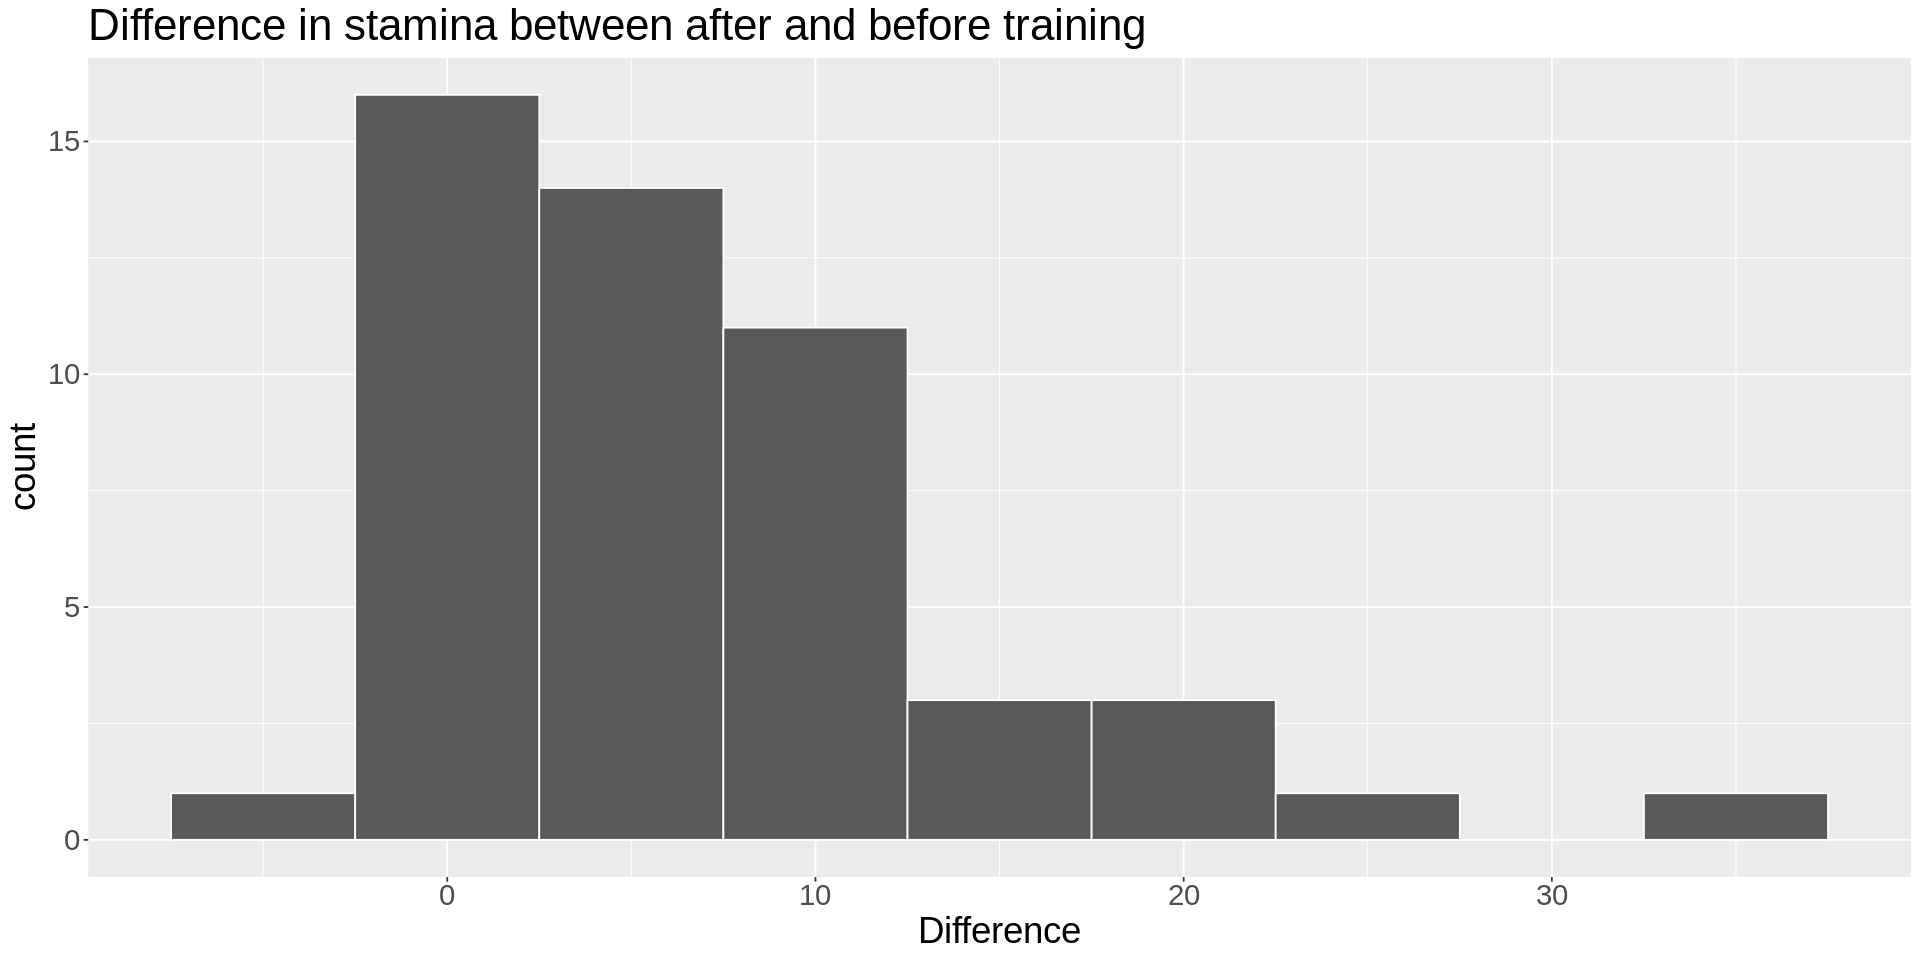

In [72]:
### BEGIN SOLUTION
diff_histogram <- 
    training %>% 
    ggplot() + geom_histogram(aes(d), color = 'white', binwidth = 5) +
    xlab("Difference") +
    ggtitle("Difference in stamina between after and before training") +
    theme(text = element_text(size=22))
### END SOLUTION
diff_histogram

In [73]:
test_3.5.2()

[1] "Success!"


**Question 3.5.3**
<br>{points: 1}

Based on the histogram from the previous question, how would you classify the population distribution of the differences?

A. symmetric and unimodal;

B. asymmetric and unimodal;

C. symmetric and multimodal;

D. asymmetric and multimodal;

_Assign your answer to an object called `answer3.5.3`. Your answer should be a single character surrounded by quotes._

In [74]:
# answer3.5.3 <- ...

### BEGIN SOLUTION
answer3.5.3 <- "B"
### END SOLUTION

answer3.5.3

[1] "B"

In [75]:
test_3.5.3()

[1] "Success!"


You can see that the sample distribution is clearly not Normal. However, given that our sample size is fairly large, $n=50$, we should be fine using the CLT. 

You should always check if there are strong violations of the assumptions made by a given test. If you suspect that there is a violation, you can always perform a simulation based hypothesis test. 

**Question 3.5.4** 
<br> {points: 1}

Calculate the test statistic, $T$.

_Assign your answer to an object called `answer3.5.4`. Your answer should be a single number._

In [76]:
# answer3.5.4 <- ...

### BEGIN SOLUTION
answer3.5.4 <- 
    sqrt(nrow(training))*mean(training$d)/sd(training$d)
### END SOLUTION
answer3.5.4

[1] 6.104036

In [77]:
test_3.5.4()

[1] "Success!"


**Question 3.5.5** 
<br> {points: 1}

Obtain the p-value of the test.

_Assign your answer to an object called `answer3.5.5`. Your answer should be a single number._

In [78]:
# answer3.5.5 <- ...

### BEGIN SOLUTION
answer3.5.5 <- pt(answer3.5.4, nrow(training) - 1, lower.tail = FALSE)
### END SOLUTION
answer3.5.5

[1] 8.088482e-08

In [79]:
test_3.5.5()

[1] "Success!"


**Question 3.5.6**
<br>{points: 1}

What is your conclusion at 1% significance?

A. At a 1% significance level, we conclude that training was effective, and the participants showed a significant improvement in stamina. 

B. At a 1% significance level, we conclude that training was ineffective, and the participants' improved stamina was not statistically significant. 

_Assign your answer to an object called `answer3.5.6`. Your answer should be a single character surrounded by quotes._

In [80]:
# answer3.5.6 <- ...

### BEGIN SOLUTION
answer3.5.6 <- "A"
### END SOLUTION

In [81]:
test_3.5.6()

[1] "Success!"


**Question 3.5.7**
<br>{points: 1}

Let R do the work for you. The function `t.test` that you used earlier can also calculate the `paired t.test`. Check the documentation and perform the `paired t.test` using the R's `t.test` function. Make sure to use `broom::tidy()` to get a more organized result.
 

_Assign your answer (the output of `t.test`) to an object called `answer3.5.7`._

In [82]:
# answer3.5.7 <- ...

### BEGIN SOLUTION
answer3.5.7 <- 
    tidy(t.test(x = training$after_training, 
           y = training$before_training, 
           paired = TRUE,
           alternative = 'greater'))
### END SOLUTION

answer3.5.7

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6.904301,6.104036,8.088482e-08,49,5.007947,Inf,Paired t-test,greater


In [83]:
test_3.5.7()

[1] "Success!"
